# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
%matplotlib inline

In [2]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [4]:
# Your code goes here
print("Statistical information:\n",X.describe())
print("Possible class clusters:\n",np.unique(y))
print("Words:\n",X.columns.values)
print("Data",X.head(10))

Statistical information:
                abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002149     0.006709     0.001454     0.002286   
std       0.030224     0.020739     0.034631     0.023100     0.021634   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003953     0.003115     0.000921     0.008366     0.001816   
std       0.030111     0.026958     0.016275     0.043921     0.026026   
min       0

*Your answer goes here*
As it is obvious from the table, the columns are so much sparse and there is a possibility of reducing the computational complexity by employing proper algorithms like (TACO from MIT, many more). This is re-ensured by the inter-quartile region values (25%, 50%, 75%) in the table. Surprisingly, even after todense() is applied, the data is sparse.

Instead of frequency score or probability score, we use TF-IDF, which is a famous representation of words (recently, word2vec and Glove).

[[ A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms. Source: Wikipedia]]

Y values have been trimmed to only 5 categories from 20 as it is in the actual dataset.

Stopwords are intentionally removed as they will result in having more importance and they dont matter much with clustering (document classification from an application POV)

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [5]:
# Your code goes here
km = KMeans(n_clusters=5, random_state=1337, init = "k-means++") # init is used just to speed up the convergence
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1337, tol=0.0001, verbose=0)

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [6]:
# Your code goes here
# np.linalg.norm(X.mean-X.iloc[1])  # try-out
print("average distance of a data point from the centre: ",np.mean(np.linalg.norm(X-X.mean(), axis=1)))
print("Total Inertia: ",km.inertia_)
print("ARI score: ", adjusted_rand_score(y, km.labels_))

average distance of a data point from the centre:  0.954584949852
Total Inertia:  2593.37189411
ARI score:  0.250608658757


*Your answer goes here*
1. Inertia:
Inertia is basically euclidean distance between a data point to its nearest centroid (or mean of the cluster). Here, we get a sum of the distance between all te datapoints and their respective cluster means. Going deeper, inertia cannot be used as an objective metric, inertia is sensitive to the number of datapoints, number of clusters. It can only be a subjective measure. Fundamentally, k-means is all about minimizing inertia and thats its convergence. It yields 0 for farther points and 1 for 0 distance. An observation is total inertia value will always be lesser than the total number of datapoints and also it will be very small if the number of principal components is less.

ARI:
ARI is a simple measure that depicts the agreement of the classes on a single datapoint. It does not concern the permutation of the classes for a single class and spend k! computations on it. It applies the algorithm on a contigency table where pair-wise similairity is measured. ARI score will be 0 for completely orthogonal datapoints and 1 for same datapoints.

2. Quality of the classifier seems to be poor (atleast as depicted by inertia and ARI). Given a data size of 2845 our inertia is 2593 which shows most datapoints are far away from their centroids. Consequently the clusters becoming spread all over. ARI gives 0.25 (25%), where even prior probability is 20% (100/5 clusters). ARI mirrors the poor quality of the classifier. 

### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

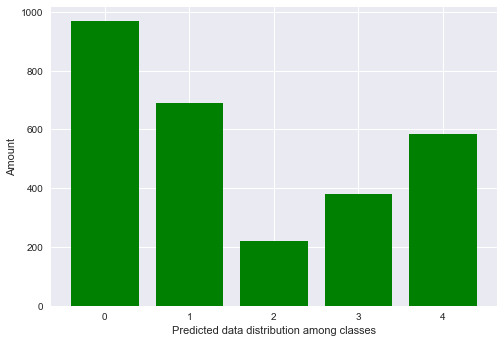

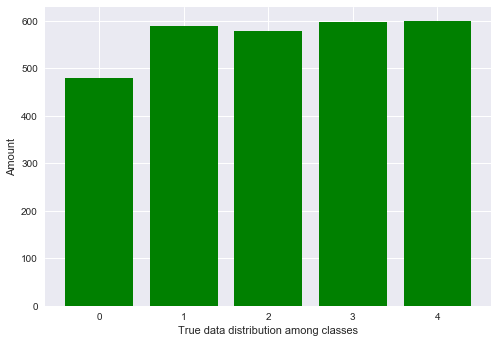

Clustered data
the number of datapoints assigned to each cluster 0 :  969
the number of datapoints assigned to each cluster 1 :  689
the number of datapoints assigned to each cluster 2 :  222
the number of datapoints assigned to each cluster 3 :  381
the number of datapoints assigned to each cluster 4 :  584
True data
the number of datapoints assigned to each cluster alt.atheism :  480
the number of datapoints assigned to each cluster comp.sys.ibm.pc.hardware :  590
the number of datapoints assigned to each cluster comp.sys.mac.hardware :  578
the number of datapoints assigned to each cluster rec.sport.baseball :  597
the number of datapoints assigned to each cluster rec.sport.hockey :  600


In [7]:
# Your code goes here
km_pred = np.unique(km.labels_, return_counts=True)
pred = np.unique(y, return_counts=True)
plt.bar(list(km_pred[0]), km_pred[1], color='g')
plt.ylabel("Amount")
plt.xlabel("Predicted data distribution among classes")
plt.show()
plt.bar([0,1,2,3,4], pred[1], color='g')
plt.ylabel("Amount")
plt.xlabel("True data distribution among classes")
plt.show()
print("Clustered data")
for i in range(5):
    print("the number of datapoints assigned to each cluster",km_pred[0][i],": ",km_pred[1][i])
print("True data")
for i in range(5):
    print("the number of datapoints assigned to each cluster",pred[0][i],": ",pred[1][i])
#     print("the number of datapoints assigned to each cluster",pred)

*Your answer goes here*
The plots show that the data is evenly distributed amonng clusters except the atheism class (id = 0). Having that said, the clusters predicted the data like its shown in the former plot. It is unevenly distributed and also it is not even closer in any sense to the actual data. The reason should be the initialization of the centroids and the model got converged at a local mimima of inertia. kmeans++ is an inbuilt sklearn module which initializes centroids which are of high variance. Even doing this, the model failed to prove. Hence, random initializer could (not certain though) work. 

### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [8]:
# Your code goes here
# np.linalg.norm(X.iloc[0]-X.iloc[1])
center_points = km.cluster_centers_ 
distance_matrix = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        distance_matrix[i][j] = np.linalg.norm(center_points[i]-center_points[j])
print(distance_matrix)

[[ 0.          0.18862704  0.34253171  0.21613938  0.20554353]
 [ 0.18862704  0.          0.32152977  0.27272268  0.29016893]
 [ 0.34253171  0.32152977  0.          0.39789789  0.40913504]
 [ 0.21613938  0.27272268  0.39789789  0.          0.28301014]
 [ 0.20554353  0.29016893  0.40913504  0.28301014  0.        ]]


### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

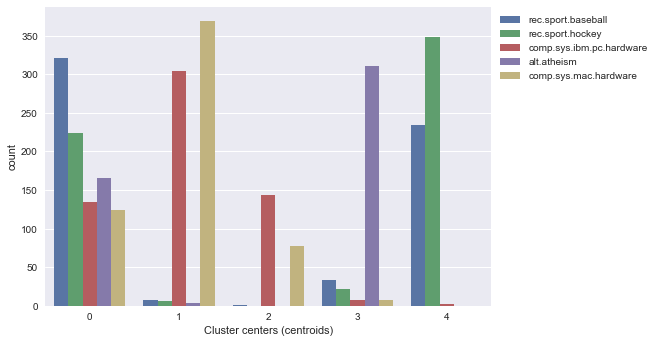

In [9]:
# Your code goes here
ax = sns.countplot(x=km.labels_, hue=y)
plt.xlabel("Cluster centers (centroids)")
ax.legend(bbox_to_anchor=(1, 1)) # The legends were hindering one of the bars in the plot, hence the extra code

*Your answers goes here*
As per the plot, only cluster number 3  seems to classify well (relatively). We can see that cluster 3 corresponds to atheism class. The reason for this is atheism is not related to any of the other topics here as (baseball, hockey) and (ibm, mac) have. To prove this claim, in clusters 1 and 2 the model got confused with ibm and mac topics. Likewise, the cluster number 4 (confused with baseball and hockey).

Having all these said, cluster 0 is still bad and widens over every class type data. The confusion between class pairs can be removed by dimensionality reduction (say PCA). PCA only preserves the orthogonal structure of the dataset. Pre-processing data by SVD could help k-means clustering.

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

Shape of PCA:  (2845, 1)
Total Inertia:  2.82304220115
ARI score:  0.210224741012
------------------------------
Shape of PCA:  (2845, 2)
Total Inertia:  10.5709620407
ARI score:  0.267077802348
------------------------------
Shape of PCA:  (2845, 3)
Total Inertia:  20.4781499242
ARI score:  0.238160447142
------------------------------
Shape of PCA:  (2845, 5)
Total Inertia:  49.7230934184
ARI score:  0.226720463102
------------------------------
Shape of PCA:  (2845, 10)
Total Inertia:  117.628581278
ARI score:  0.215865965685
------------------------------
Shape of PCA:  (2845, 20)
Total Inertia:  230.222826949
ARI score:  0.212697683717
------------------------------
Shape of PCA:  (2845, 50)
Total Inertia:  488.436150415
ARI score:  0.211745130257
------------------------------
Shape of PCA:  (2845, 100)
Total Inertia:  801.193505854
ARI score:  0.221823810808
------------------------------
Shape of PCA:  (2845, 500)
Total Inertia:  2131.91161593
ARI score:  0.214577542655
-------

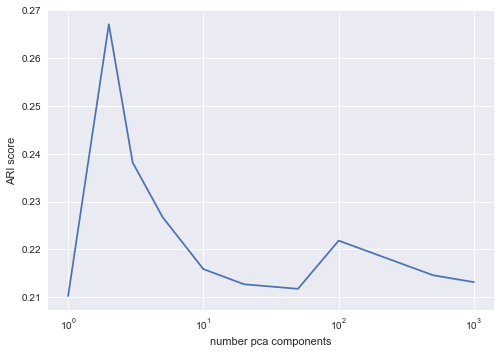

In [10]:
# Your code goes here
inertia_scores = []
ari_scores = []
n_components = [1,2,3,5,10,20,50,100,500,1000]
for i in n_components:
    X_pca = PCA(n_components = i).fit_transform(X)
    print("Shape of PCA: ",X_pca.shape)
    km_in_loop = KMeans(n_clusters=5, random_state=1337, init = "k-means++")
    km_in_loop.fit(X_pca)
    print("Total Inertia: ",km_in_loop.inertia_)
    inertia_scores.append(km_in_loop.inertia_)
    print("ARI score: ", adjusted_rand_score(y, km_in_loop.labels_))
    ari_scores.append(adjusted_rand_score(y, km_in_loop.labels_))
    print("------------------------------")
    
plt.semilogx(n_components, ari_scores, basex=10)
plt.xlabel("number pca components")
plt.ylabel("ARI score")
plt.show()

*Your answer goes here*
1. The plot descibes the optimal pca components count that yields highest ARI value. It is around 3 to 6. As you can see there are multiple local maxima too and without doing PCA [where, number_of_pca_components = actual features count ] there would have been a local maxima in ARI. Hence, our previous ARI value [Question 1.3]

2. Inertia is a subjective measure and not an objective measure. Inertia is sensitive to scale of the data, number of dimensions. Also, inertia is basically sum of euclidean distance. Euclidean distance gets meaningless as the number of dimensions increase. So, inertia cannot help us decide pcs components count. 

3. PCA is good in extracting orthogonal features from the data. Especially, we saw confusions between two pairs of classes in our model earlier. PCA helps is removing all the redundant features and just retains the features with high variance, which is what we lacked in the vanilla  k-means clustering. Also, earlier, we witnessed the data to be totally sparse and pca just squishes in a proper way and result in a dense dataset.

### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

ARI score:  0.267326264459


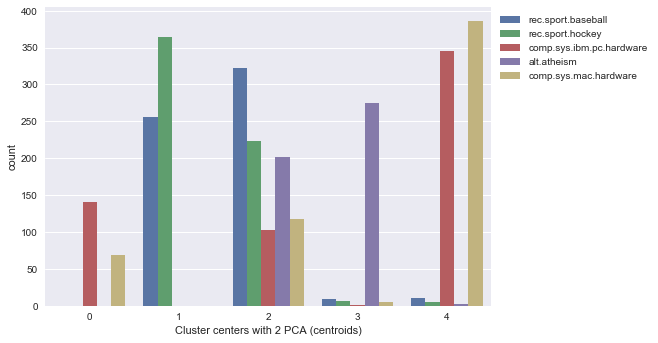

Clustered data with 2 PCA:
the number of datapoints assigned to each cluster 0 :  209
the number of datapoints assigned to each cluster 1 :  620
the number of datapoints assigned to each cluster 2 :  969
the number of datapoints assigned to each cluster 3 :  297
the number of datapoints assigned to each cluster 4 :  750


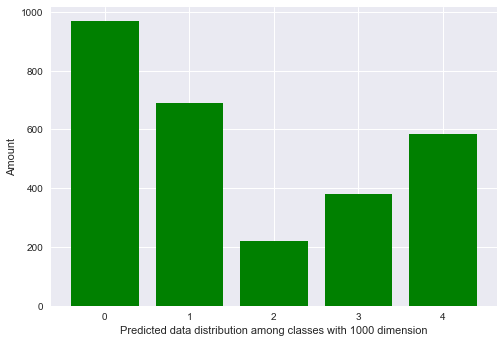

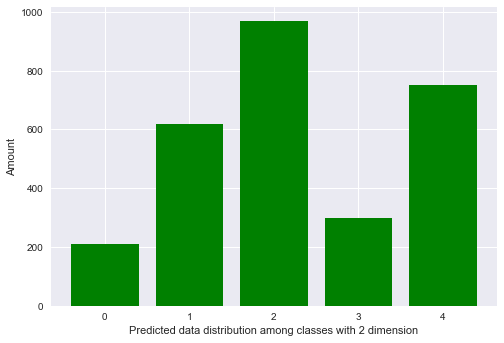

In [11]:
# Your code goes here
X_2d = PCA(n_components= 2).fit_transform(X)
kmeans_pca = KMeans(n_clusters=5, random_state=1337, init = "k-means++")
kmeans_pca.fit(X_2d)
print("ARI score: ", adjusted_rand_score(y, kmeans_pca.labels_))
ax = sns.countplot(x=kmeans_pca.labels_, hue=y)
plt.xlabel("Cluster centers with 2 PCA (centroids)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()
print("Clustered data with 2 PCA:")
for i in range(5):
    print("the number of datapoints assigned to each cluster",np.unique(kmeans_pca.labels_, return_counts=True)[0][i],": ",np.unique(kmeans_pca.labels_, return_counts=True)[1][i])
    
plt.bar([0,1,2,3,4], km_pred[1], color='g')
plt.ylabel("Amount")
plt.xlabel("Predicted data distribution among classes with 1000 dimension")
plt.show()
plt.bar(np.unique(kmeans_pca.labels_, return_counts=True)[0], np.unique(kmeans_pca.labels_, return_counts=True)[1], color='g')
plt.ylabel("Amount")
plt.xlabel("Predicted data distribution among classes with 2 dimension")
plt.show()    

*Your answer goes here*
Yes, the ARI values have slightly increased but there is no much of a difference. The size of second largest and third largest clusters have increased a bit, removing few confusions. 

PS: the order of the bars couldnt be made connsitent as kmeans orders it arbitrarily.

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [27]:
# Your code goes here
classes_from_plot = ['alt.atheism', 'comp.sys.mac.hardware', 'rec.sport.hockey', 'comp.sys.ibm.pc.hardware', 'rec.sport.baseball']
labels_interp = np.array(classes_from_plot)[kmeans_pca.labels_]

### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

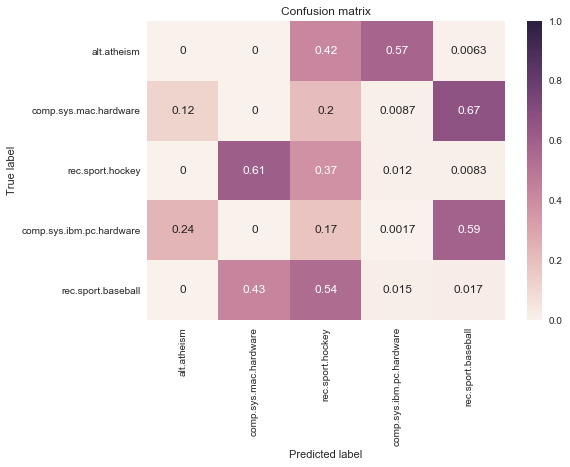

In [29]:
# Your code goes here
##################### Credits: Teaching Assistant: Lab solution code
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    plt.figure()
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
##################### 


cats = ['alt.atheism', 'comp.sys.mac.hardware', 'rec.sport.hockey', 'comp.sys.ibm.pc.hardware', 'rec.sport.baseball']
cm = confusion_matrix(y, labels_interp, labels=cats)

# Normalize the confusion matrix
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=cats)

Note: Columns are juggled and did not have much time to look into. It was fine a day before submission.

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

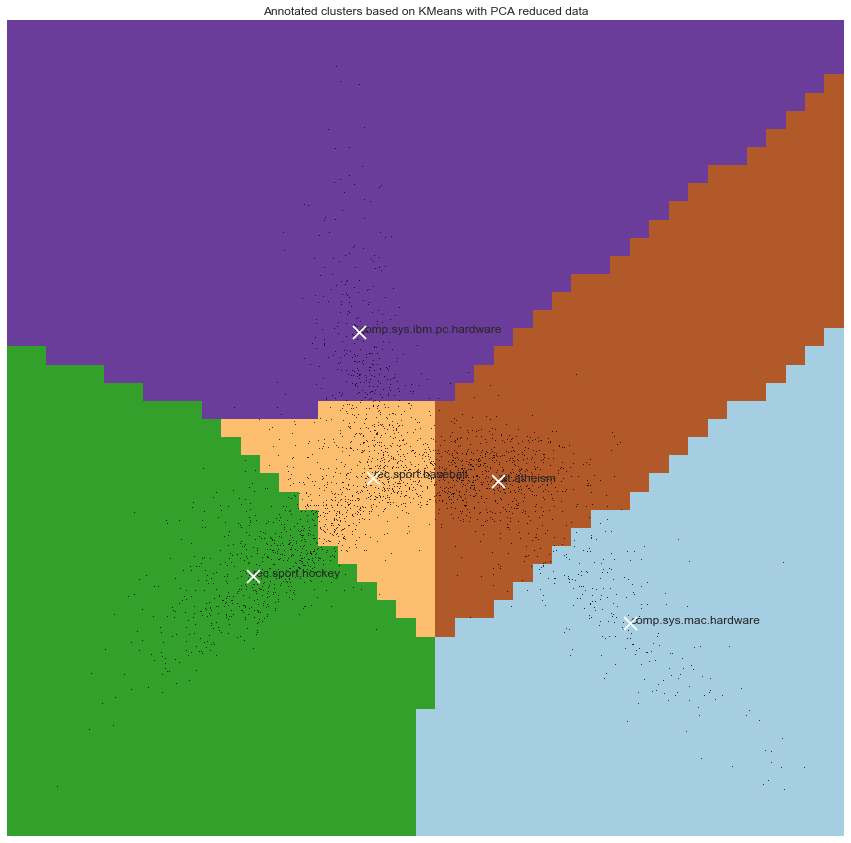

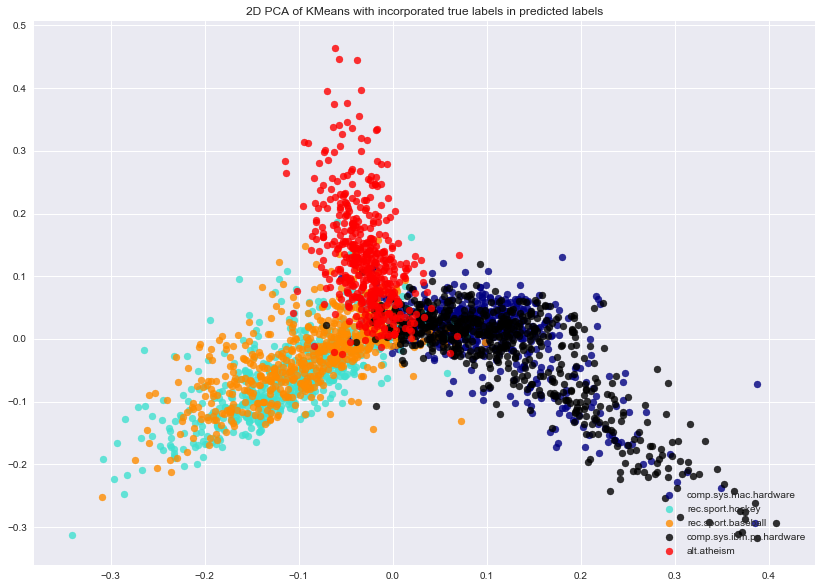

In [14]:
# Your code goes here
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - .05, X_2d[:, 0].max() + .05
y_min, y_max = X_2d[:, 1].min() - .05, X_2d[:, 1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
fig, ax = plt.subplots(figsize=(15,15))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

# Cluster annotation
for centroid, label in zip(centroids,cats): 
    plt.annotate(label, xy=centroid, xytext=(centroid[0],centroid[1]))
plt.title('Annotated clusters based on KMeans with PCA reduced data')
plt.xticks(())
plt.yticks(())
plt.show()

colors = ['navy', 'turquoise', 'darkorange','black','red']
plt.figure(figsize=(14,10))
for color, target_name in zip(colors, cats):
    plt.scatter(X_2d[y == target_name, 0], X_2d[y == target_name, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc=4, shadow=False, scatterpoints=1)
plt.title('2D PCA of KMeans with incorporated true labels in predicted labels')

plt.show()

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Your answer goes here*
1. kmeans algorithm is NOT deterministic, which means the result is not the same everytime you run the algorithm. We can observer this by re-running one of the model fit cells in the noteboook. It is an unsupervised, clustering algorithm whihc is initialized randomly(whole or part), so it is acceptable.

2. In question 1.2, only one calculated initialization was made. One initialisation was enough as the centroid spread all over the datasets. kmeans++ is a weighted and randomly initiated model. It randomly picks a centroid and picks the next one condioned on the previous centroid so that the next one is far away from the other to cover almost every part of the dataset. 

3. Just randomly initialising centroids wihtout checking variance could possibly work. The magic of randomness has surprised me many times and iteratively randomizing and fitting multiple times and choosing a model with low inertia seems sensible. But the problem is that we might not end up at global mimima at all.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [16]:
# Your code goes here
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [17]:
# print(digits) # This is a dictionary and we have to extract 'data' values from it.
digits_data = pd.DataFrame(digits['data'])
digits_data.describe

<bound method NDFrame.describe of        0    1     2     3     4     5     6    7    8     9  ...     54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0   0.0 ...    0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0   0.0 ...    0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0   0.0 ...    5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0   8.0 ...    9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0   0.0 ...    0.0  0.0   
5     0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0   0.0 ...    4.0  0.0   
6     0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0   0.0 ...    8.0  0.0   
7     0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0   0.0 ...    0.0  0.0   
8     0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0   0.0 ...    8.0  0.0   
9     0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0   2.0 ...    4.0  0.0   
10    0.0  0.0   1.0   9.0  15.0  11.0   0.0  0.0  0.0   0.0 ...    0.0  0.0   
11    

In [18]:
for i in range(len(digits_data.columns.values)):
    print("Maximum value of dimension ", i, digits_data.max(axis=0)[i])
    print("Minimum value of dimension ", i, digits_data.min(axis=0)[i])

Maximum value of dimension  0 0.0
Minimum value of dimension  0 0.0
Maximum value of dimension  1 8.0
Minimum value of dimension  1 0.0
Maximum value of dimension  2 16.0
Minimum value of dimension  2 0.0
Maximum value of dimension  3 16.0
Minimum value of dimension  3 0.0
Maximum value of dimension  4 16.0
Minimum value of dimension  4 0.0
Maximum value of dimension  5 16.0
Minimum value of dimension  5 0.0
Maximum value of dimension  6 16.0
Minimum value of dimension  6 0.0
Maximum value of dimension  7 15.0
Minimum value of dimension  7 0.0
Maximum value of dimension  8 2.0
Minimum value of dimension  8 0.0
Maximum value of dimension  9 16.0
Minimum value of dimension  9 0.0
Maximum value of dimension  10 16.0
Minimum value of dimension  10 0.0
Maximum value of dimension  11 16.0
Minimum value of dimension  11 0.0
Maximum value of dimension  12 16.0
Minimum value of dimension  12 0.0
Maximum value of dimension  13 16.0
Minimum value of dimension  13 0.0
Maximum value of dimension  1

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


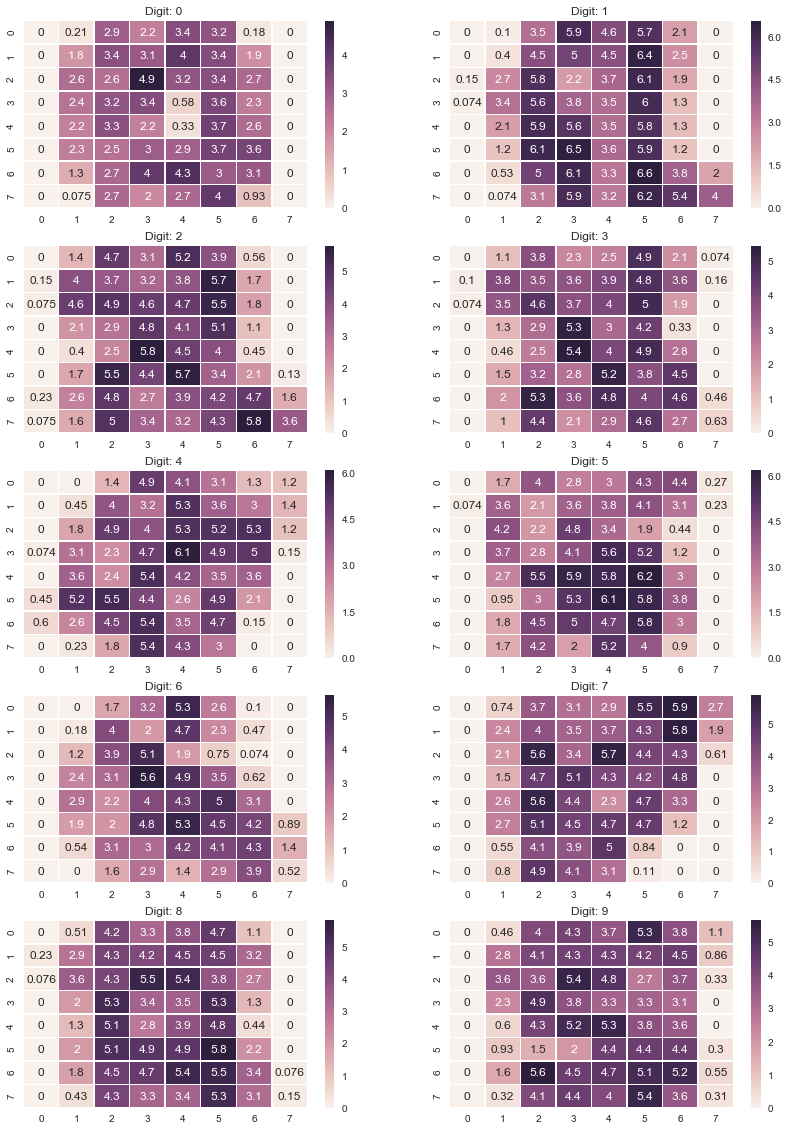

In [19]:
stds = digits_data.groupby(digits.target).std()
std_matrix = []
for i in range(10):
    std_matrix.append((stds.iloc[i]).reshape(8,8))
# print(std_matrix)

fig,axn = plt.subplots(5, 2, figsize=(14,20))
for ax,i in zip(axn.flat, range(10)):
    sns.heatmap(std_matrix[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Digit: {} ".format(i))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


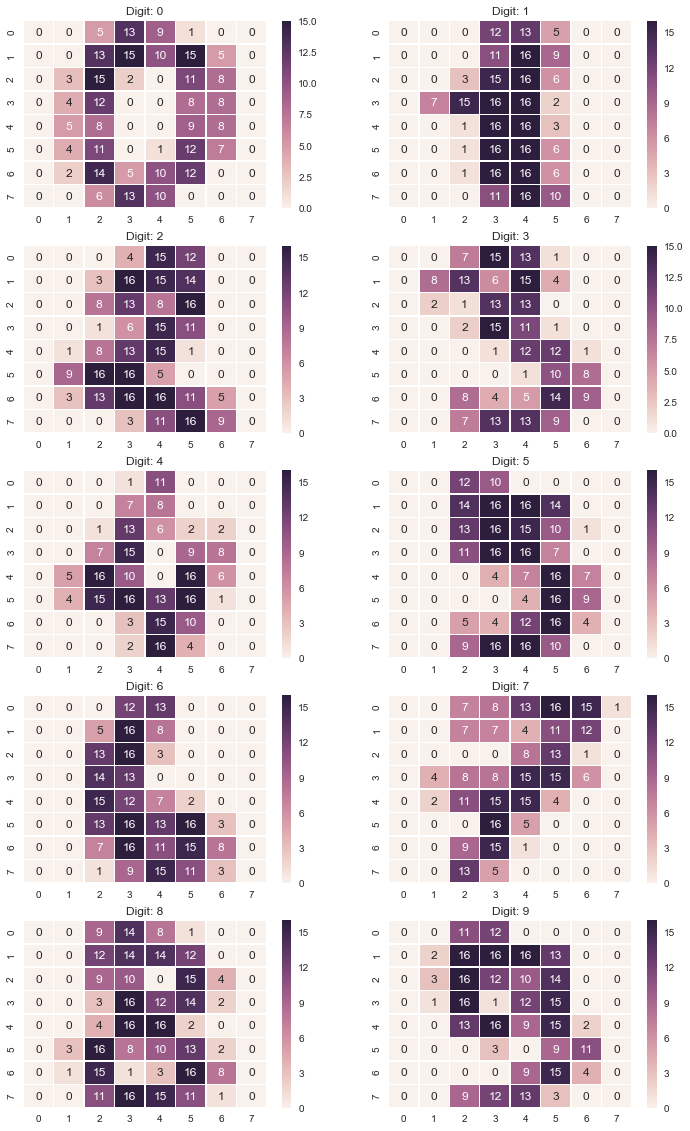

In [20]:
# number_groups = digits_data.groupby(digits.target)
# print(number_groups[0].reshape(8,8))

temp = [np.zeros([8,8]) for _ in range(10)]
numbers = np.dstack(temp)

numbers = np.rollaxis(numbers,-1)

for i in range(10):
    numbers[i] = digits_data.iloc[i].reshape((8,8))

fig,axn = plt.subplots(5, 2, figsize=(12,20))

for ax,i in zip(axn.flat, range(10)):
    sns.heatmap(numbers[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Digit: {}".format(i))

*Your answer goes here*

Actually, yes. We could easily argue telling first and last column in the plots above can be neglected as they do not contribute much but images specifically is better if it is blurry and by blurry I mean the density of variation will spread across. And I feel it is necessary to retain all the dimensions to get a clear and confident output.

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

29


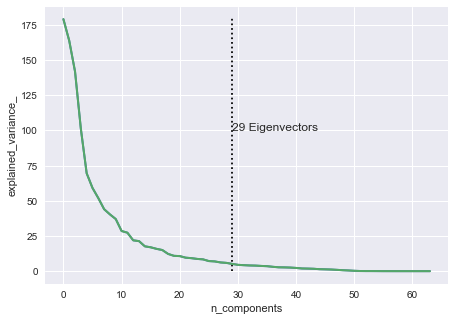

In [21]:
# Your code goes here
pca = PCA(n_components = digits.data.shape[1])
X_digits = digits.data
y_digits = digits.target
pca.fit(X_digits)

variance = np.sum(pca.explained_variance_)
aggregate_variance = 0.0
for i in range(len(pca.explained_variance_)):
    aggregate_variance += pca.explained_variance_[i]
    if float(aggregate_variance / variance) > .95:
        the_point = i;
        break;
the_point = the_point + 1 # iterator starts from 0. 1 is added to number it properly.
print(the_point)
plt.figure(1)
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.plot(pca.explained_variance_, linewidth=2)
# plt.vlines(1, 0, 180, linestyle="dotted")
plt.vlines(the_point, 0, 180, linestyle="dotted")
plt.annotate("{} Eigenvectors".format(the_point), xy=(the_point,100))


*Your answer goes here*

First of all, eigen vectors actually mean the number of orthogonal dimensions that has the more variance. Here, we have been filtering out the number of dimensions that cover around 95% of total variance. And we land up at 29. This also means we can truncate the other dimensions and still could work with just these dimensions.

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

(64, 64)


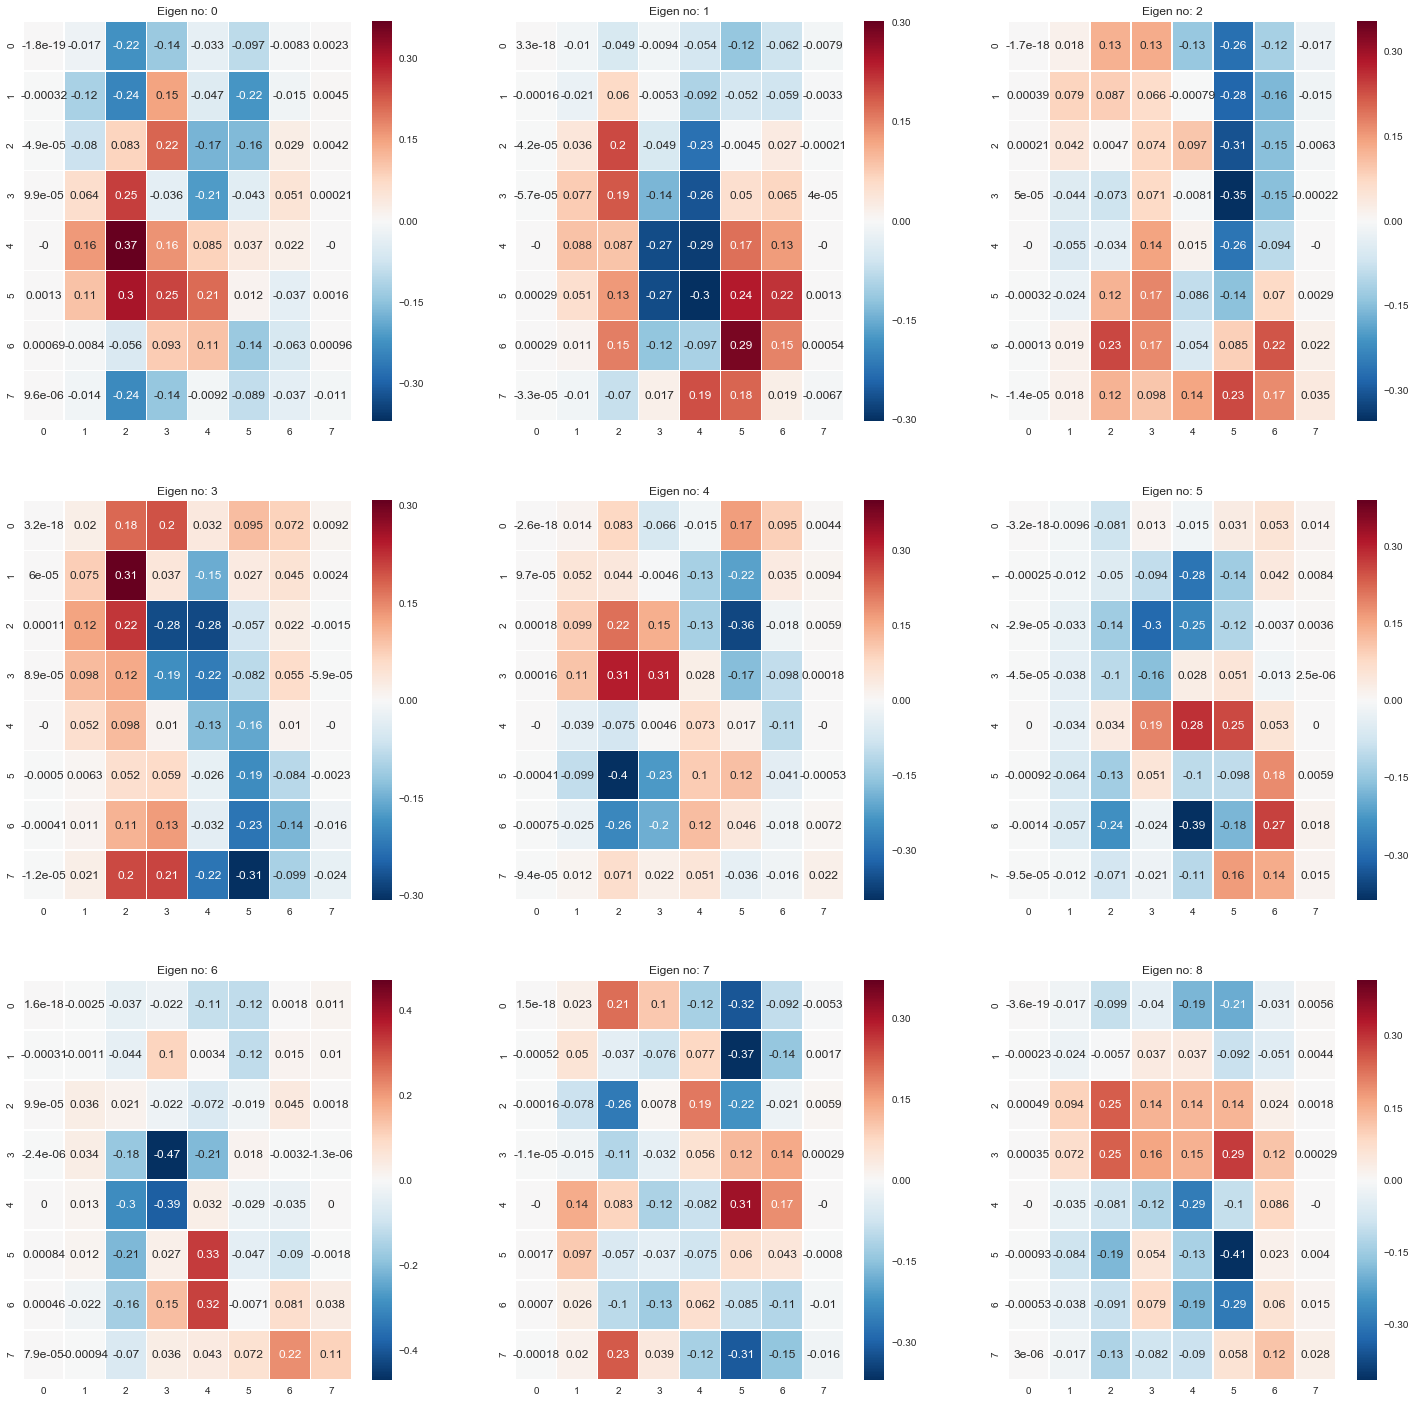

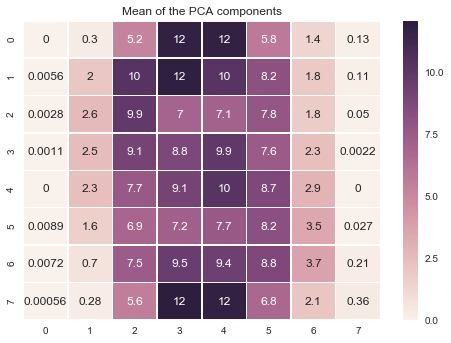

In [22]:
# Your code goes here
pca_eigens = []
print(pca.components_.shape)
for i in range(9):
    pca_eigens.append(pca.components_[i].reshape((8,8)))
fig,axn = plt.subplots(3,3, figsize=(25,25))

for ax,i in zip(axn.flat, range(9)):
    sns.heatmap(pca_eigens[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Eigen no: {}".format(i))
plt.show()
pca_mean = pca.mean_.reshape(8,8)
ax = sns.heatmap(pca_mean, annot=True, linewidths=.5)
ax.set_title('Mean of the PCA components')

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Analyzing digit:  0
(64, 64)


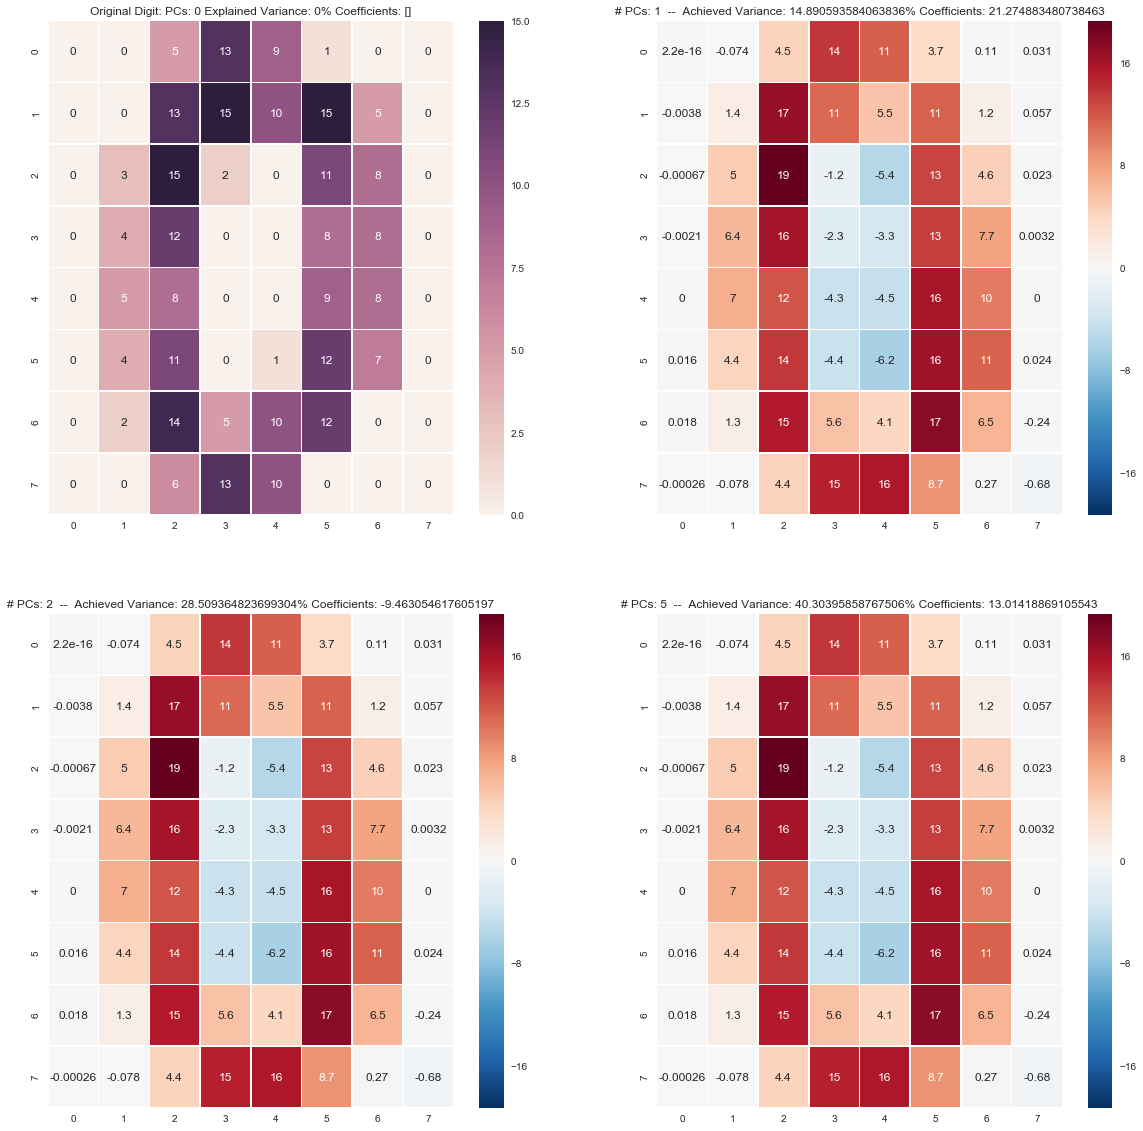

In [23]:
# Your code goes here
recreated_numbers_list = []
recreated_numbers_list.append(digits_data.iloc[0].reshape((8,8))) #Original digit insertion
pca_options = [1,2,5]
print("Analyzing digit: ",digits.target[0])  # We are gonna analyse digit 0.
coefficients_in_pca_space = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
print(pca.components_.shape)
for i in pca_options:
    recreated_digit = pca.mean_
    for j in range(i):
        recreated_digit += pca.components_[j] * coefficients_in_pca_space[j]
    recreated_numbers_list.append(recreated_digit.reshape((8,8)))

fig,axn = plt.subplots(2, 2, figsize=(20,20))

for ax,i in zip(axn.flat, range(4)):
    sns.heatmap(recreated_numbers_list[i], ax=ax, annot=True, linewidths=.5)
    if (i==0):
        ax.set_title("Original Digit: PCs: 0 Explained Variance: 0% Coefficients: []")
    else:
        ax.set_title("# PCs: {}  --  Achieved Variance: {}% Coefficients: {}".format( pca_options[i-1], 100*sum(pca.explained_variance_[0:i])/sum(pca.explained_variance_), coefficients_in_pca_space[i]))

*Your answer goes here*
Even smaller PCAs provide clearer illustrations which is ensured by the variance achieved.  As all the pixels variance scal downas the the nnumber PCs reduce, it is fine to even work on 1 PC with 14% variance

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

In [24]:
# Your code goes here
transformed = pca.fit_transform(digits.data)

# fit 4 models
kf_digits = KFold(digits_data.shape[0], n_folds=5, shuffle=True, random_state=1337)
score = np.zeros((4,5))
i = 0
for train_index, test_index in kf_digits:
    X_train, X_test = digits.data[train_index], digits.data[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]
    
    train_pca = transformed[train_index, :] 
    test_pca = transformed[test_index, :]
    
    svc_raw = SVC(kernel="linear", shrinking=False, random_state=1337)
    svc_raw.fit(X_train, y_train)
    score[0][i] = svc_raw.score(X_test, y_test)
    svc_transformed = SVC(kernel="linear", shrinking=False, random_state=1337)
    svc_transformed.fit(train_pca, y_train)
    score[1][i] = svc_transformed.score(test_pca, y_test)
    gnb_raw = GaussianNB()
    gnb_raw.fit(X_train, y_train)
    score[2][i] = gnb_raw.score(X_test, y_test)
    gnb_transformed = GaussianNB()
    gnb_transformed.fit(train_pca, y_train)
    score[3][i] = gnb_transformed.score(test_pca, y_test)
    i += 1
# print(score)
classifiers_digits = ["SVM","SVM with PCA","Gaussian NB","Gaussian NB with PCA"]
for i in range(4):
    print("Mean Score for {}: {}".format(classifiers_digits[i], np.mean(score[i])))

TypeError: __init__() got an unexpected keyword argument 'n_folds'

*Your answer goes here*
We see a spiking increase in the score of Gaussian Naive Bayes. And SVM shows no impact on reducing dimensionality. 
As it was mentioned in the lectures, Naive bayes and its variants assume that each feature is independent of each other. As PCA only produces orthogonal (totally non-independent) features, PCA has such an influence in accuracy.


PS: SVM classifiers are always better than SVM in general (despite a few datasets, which are small and feature-independent).